In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clr
from collections import deque
import matplotlib.pylab as pylab

In [2]:
def f(x, y):
    return (x * y < 60) & ((x+y*0.5) * (x*0.5-y) < 60 * np.sqrt(1.25)) & \
        ((x-y*0.5) * (-x*0.5-y) < 60 * np.sqrt(1.25))

In [79]:
def f(x, y):
    return (x * y < 60) & ((x+y*0.5) * (x*0.5-y) < 30 * np.sqrt(1.25)) & \
        ((x-y*0.5) * (-x*0.5-y) < 60 * np.sqrt(1.25))

In [120]:
def f(x, y):
    return (y - x * x / 7 < -10) & (y - x * x / 5.5 > -15)

In [ ]:
def f(x, y):
    return (y - x * x / 7 < -10) & (y - x * x / 5.5 > -15)

In [133]:
def product(x1, y1, x2, y2):
    return x1 * y2 - x2 * y1

def on_side(x1, y1, x2, y2, x3, y3, x, y):
    return product(x2-x1, y2-y1, x3-x1, y3-y1) * product(x2-x1, y2-y1, x-x1, y-y1) > 0

def in_circle(x0, y0, r, x, y):
    return (x-x0) ** 2 + (y-y0) ** 2 < r * r


def out_elipse(x0, y0, a, b, x, y, s):
    return ((x-x0) * np.cos(s) + (y-y0) * np.sin(s)) **2 / (a**2) + \
            ((x-x0) * np.sin(s) - (y-y0) * np.cos(s))**2 / (b**2) > 1

def f(x, y):
    return on_side(8, 0, 2, 5.8, 6, 6, x, y) & on_side(8.5, 0, 0, 7, 6, 6, x, y) &\
            in_circle(0.5, -20, 27, x, y) & on_side(10, 1.8, 4.8, 7.4, 6, 6, x, y) &\
            in_circle(5.8, 10, 10.5, x, y) & (out_elipse(4.2, 6.2, 1.3, 0.3, x, y, -3.1415/4))

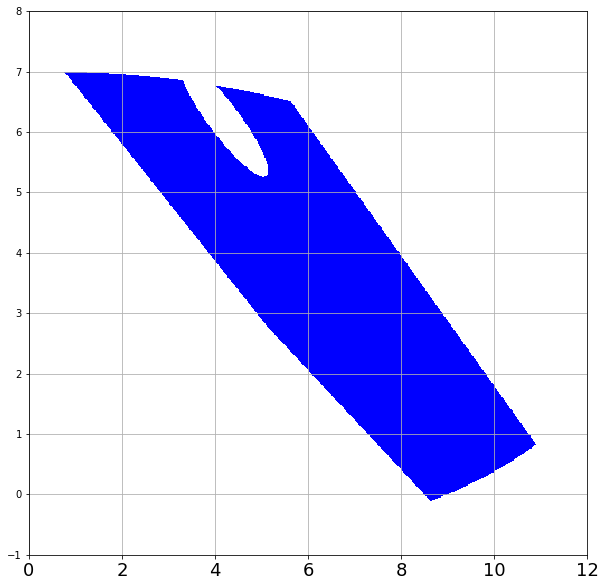

In [196]:
grid_x = np.linspace(-20, 20, 500)
grid_y = np.linspace(-20, 20, 500)


grid_x = np.linspace(0, 12, 500)
grid_y = np.linspace(-1, 8, 500)
x, y = np.meshgrid(grid_x, grid_y)

pic = f(x, y)

plt.figure(figsize=(10, 10))

cmap = clr.ListedColormap(["white", "blue"])

plt.xticks(fontsize=18)

plt.pcolormesh(grid_x, grid_y, pic, cmap=cmap)
plt.grid()
plt.show()

In [136]:
class Point(object):
    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y
    def arr(self):
        return np.array([self.x, self.y])
    def val(self):
        return (self.x, self.y)
    def double(self):
        return Point(self.x * 2, self.y * 2)
        
class Interval(object):
    def __init__(self, a: Point, b: Point):
        self.a = a
        self.b = b
    def val(self):
        return (self.a.x, self.a.y, self.b.x, self.b.y)
    def double_mid(self):
        return Point(self.a.x + self.b.x, self.a.y + self.b.y)

In [137]:
def get_coord(p: Point, start: np.array, step: int):
    return start + step * p.arr()

In [258]:
def first_step(queue, inside: np.array, step: int, cur_iter):
    
    koef = 2 ** cur_iter
    
    used = set()
    answer = []
    
    num_calc = 0
    
    for elem in queue:
        used.add(elem.val())
        answer.append(elem)
    
    while (len(queue) != 0):
        Now = queue.popleft()
        A = Now.a
        B = Now.b
        hor = A.y == B.y
        if hor:
            Ap = Point(A.x, A.y + 1)
            Am = Point(A.x, A.y - 1)
            Bp = Point(B.x, B.y + 1)
            Bm = Point(B.x, B.y - 1)
        else:
            Ap = Point(A.x + 1, A.y)
            Am = Point(A.x - 1, A.y)
            Bp = Point(B.x + 1, B.y)
            Bm = Point(B.x - 1, B.y)
            
        for pair in [[A, Ap], [A, Am], [B, Bp], [B, Bm], [Ap, Bp], [Am, Bm]]:
            if calculated.get(pair[0].val() * koef) is None:
                real_point = get_coord(pair[0], inside, step)
                calculated[pair[0].val() * koef] = f(real_point[0], real_point[1])
                num_calc += 1
            if calculated.get(pair[1].val() * koef) is None:
                real_point = get_coord(pair[1], inside, step)
                calculated[pair[1].val() * koef] = f(real_point[0], real_point[1])
                num_calc += 1
        
            res0 = calculated[pair[0].val() * koef]
            res1 = calculated[pair[1].val() * koef]
            
            if (not res0):
                res0, res1 = res1, res0
                pair[0], pair[1] = pair[1], pair[0]
            
            if (res0 != res1):
                nw = Interval(pair[0], pair[1])
                if nw.val() not in used:
                    queue.append(nw)
                    used.add(nw.val())
                    answer.append(nw)
    return answer, num_calc

In [259]:
1/2

0.5

In [260]:
def draw(answ, it, num_calc, num, step, real_point):
    grid_x = np.linspace(-20, 20, 1000)
    grid_y = np.linspace(-20, 20, 1000)
    
    
    grid_x = np.linspace(0, 12, 500)
    grid_y = np.linspace(-1, 8, 500)
    
    x, y = np.meshgrid(grid_x, grid_y)

    pic = f(x, y)

    plt.figure(figsize=(30, 30))

    cmap = clr.ListedColormap(["white", "skyblue"])

    #plt.pcolormesh(grid_x, grid_y, pic, cmap=cmap)
    plt.scatter([real_point[0]], [real_point[1]], color="red", s=500)
    
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    
   # plt.xlabel("", fontsize=40)
   # plt.ylabel("", fontsize=40)

    for elem in answ:
        rp1 = get_coord(elem.a, inside, step)
        rp2 = get_coord(elem.b, inside, step)
        plt.plot([rp1[0], rp2[0]], [rp1[1], rp2[1]], color="black", linewidth=it /4)
    
    plt.title(
              "Iteration #" + str(STEPS - it + 1) + ", num_calculated=" + str(num_calc) + ", cummulative=" + str(num) + ", interval_length=" + str(step),
    fontsize=40)

    
    plt.grid()
    plt.show()

In [261]:
to_draw = []
best_answer = []
best_point = []

In [262]:
def functional(x, y):
    return 100 - 3 * x - 5 * y

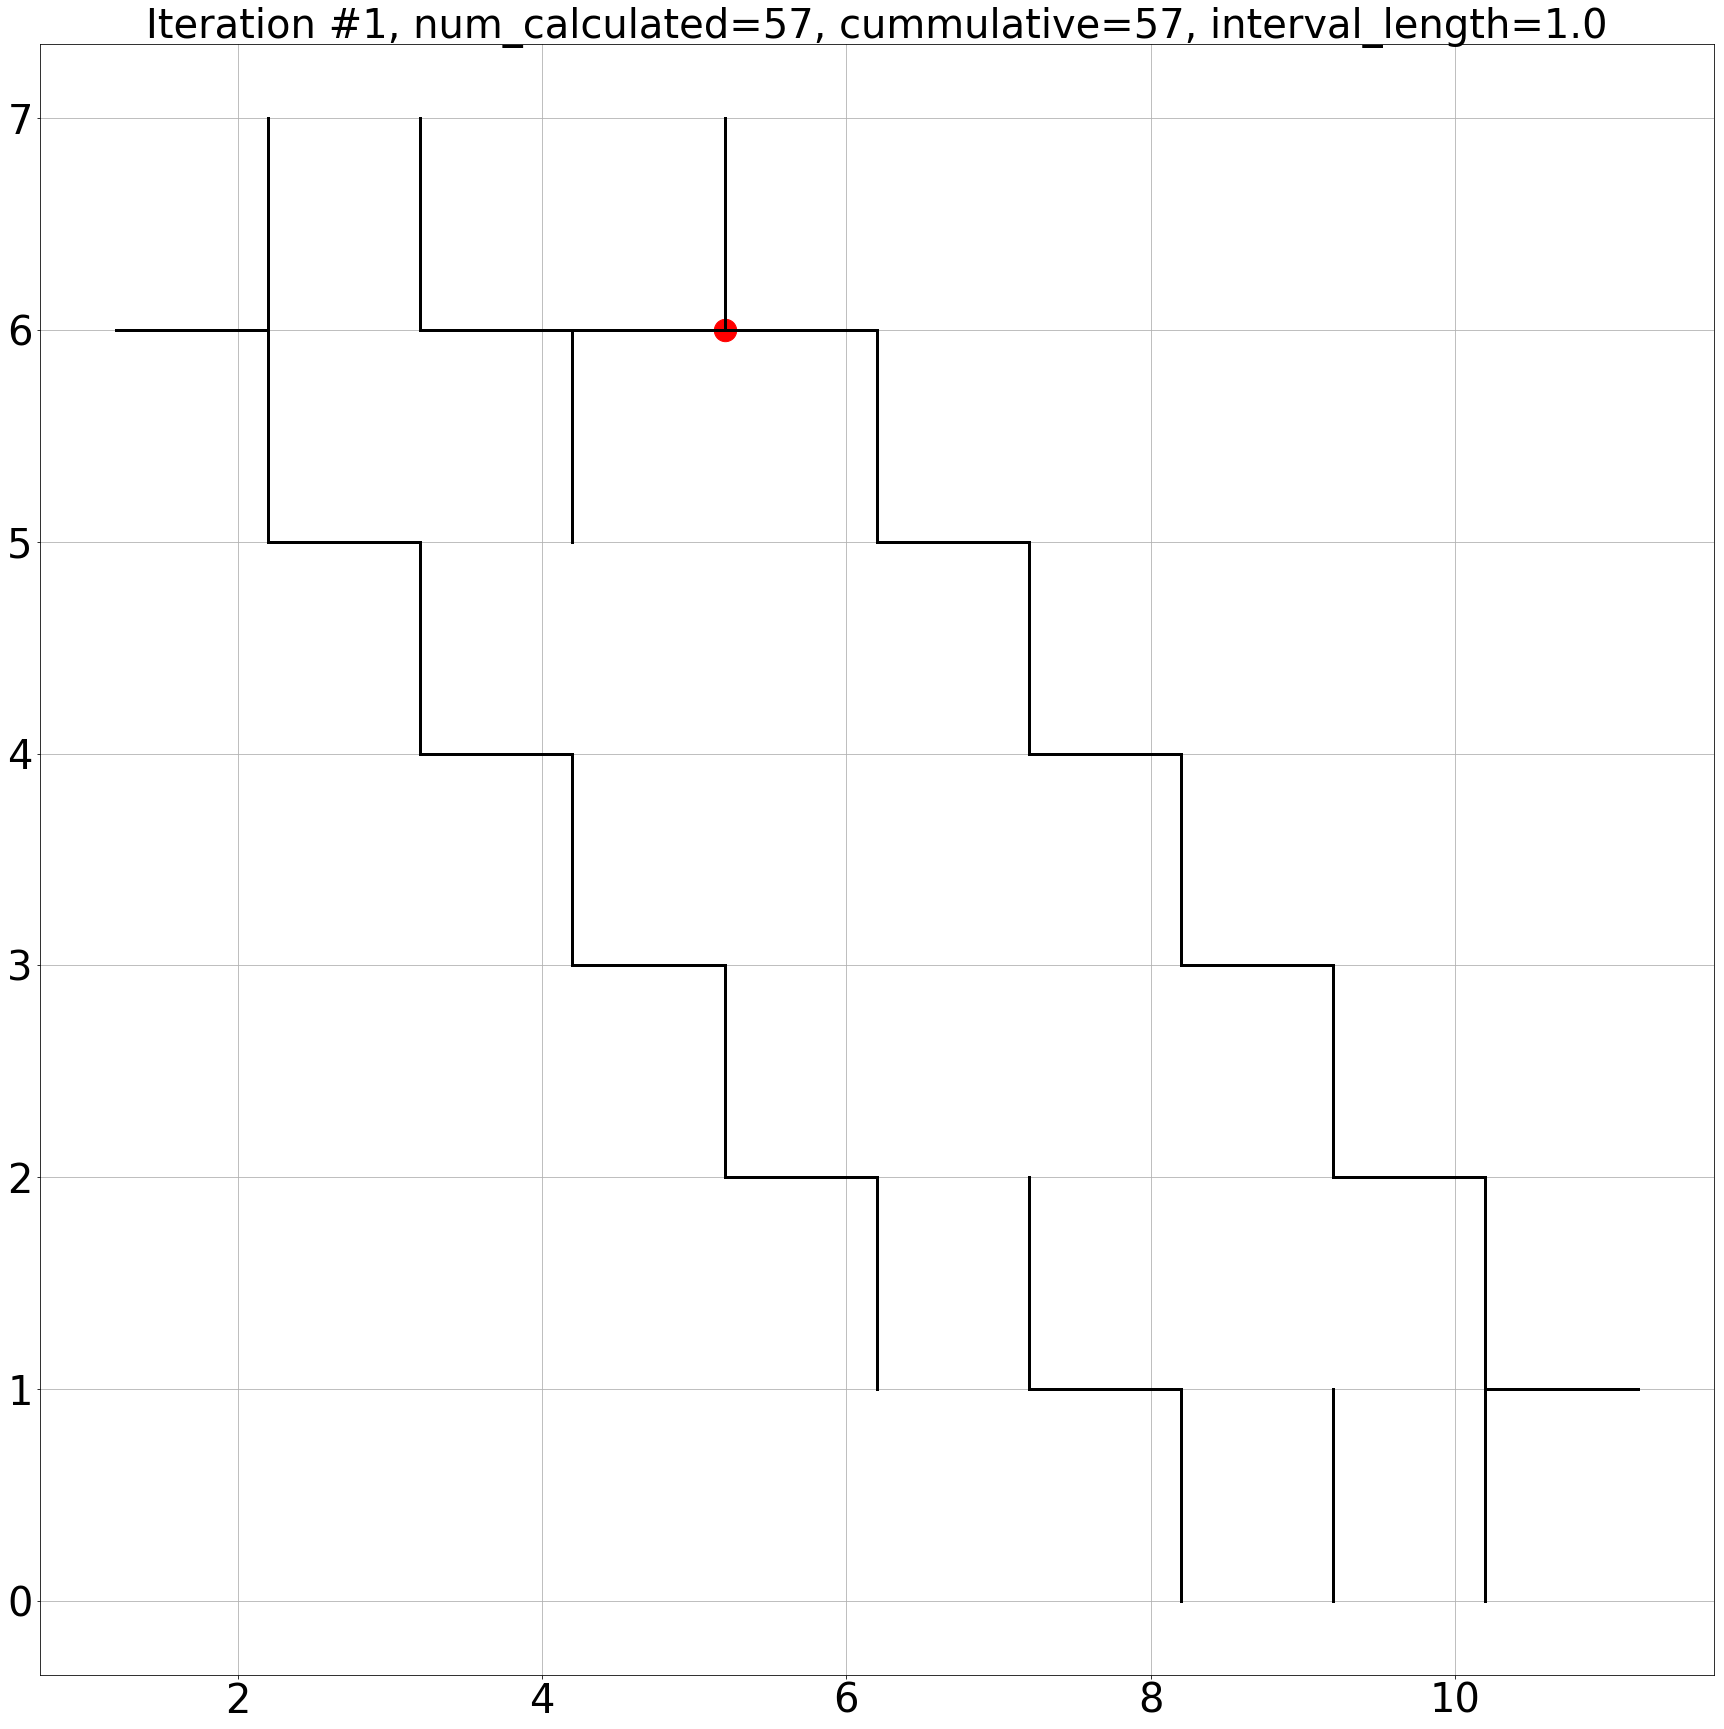

In [263]:
#inside = np.array([5.0, 5.0])
#outside = np.array([5.0, 15.0]) # для гипербол

#inside = np.array([0.0, -12.0])  # парабол
#outside = np.array([5.0, -12.0])

inside = np.array([5.2, 3.0])  # из статьи рис 7g
outside = np.array([5.2, 2.0])

step = np.sqrt(np.sum((outside - inside) ** 2))

One =  Point(0, 0)
#Two = Point(0, 1) ## ручками для гипербол!!!
#Two = Point(1, 0) ## ручками для парабол!!!
Two = Point(0, -1) ## ручками для статьи 7g
Start = Interval(One, Two)

calculated = {}
queue = deque()
queue.append(Start)

STEPS = 12
it = STEPS
answ, num_calc = first_step(queue, inside, step, it)
to_draw.append(len(calculated))


funcs = [functional(get_coord(inter.a, inside, step)[0], get_coord(inter.a, inside, step)[1]) for inter in answ]
j = np.argmin(funcs)
best_answer.append(np.min(funcs))
best_point.append(answ[j].a)
real_point = get_coord(answ[j].a, inside, step)

draw(answ, it, num_calc, len(calculated), step, real_point)

12


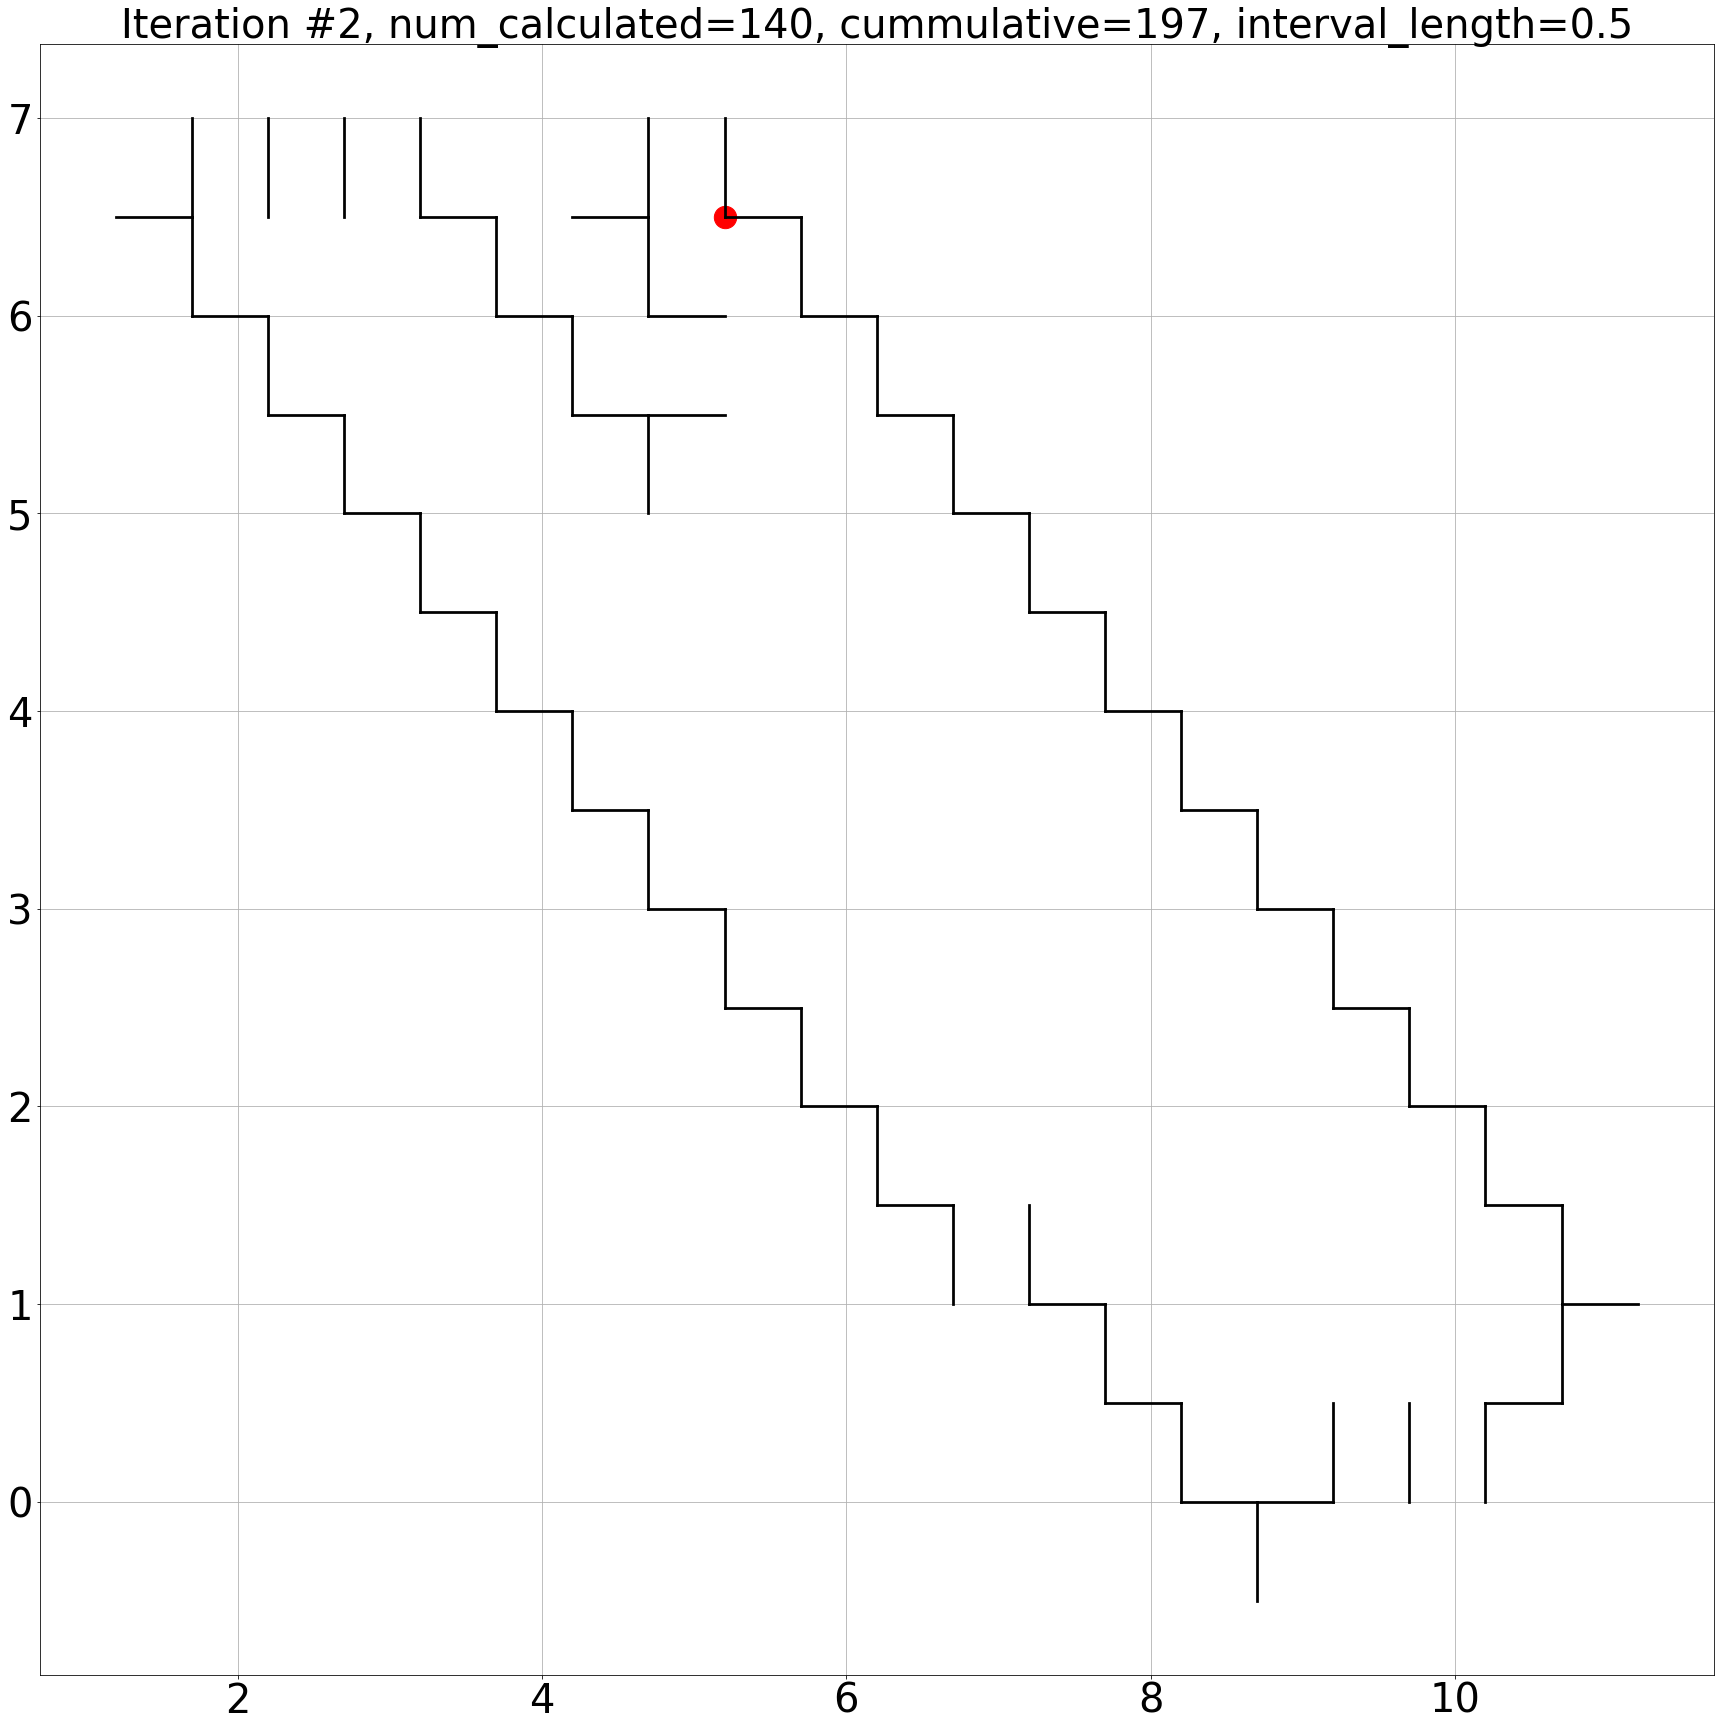

11


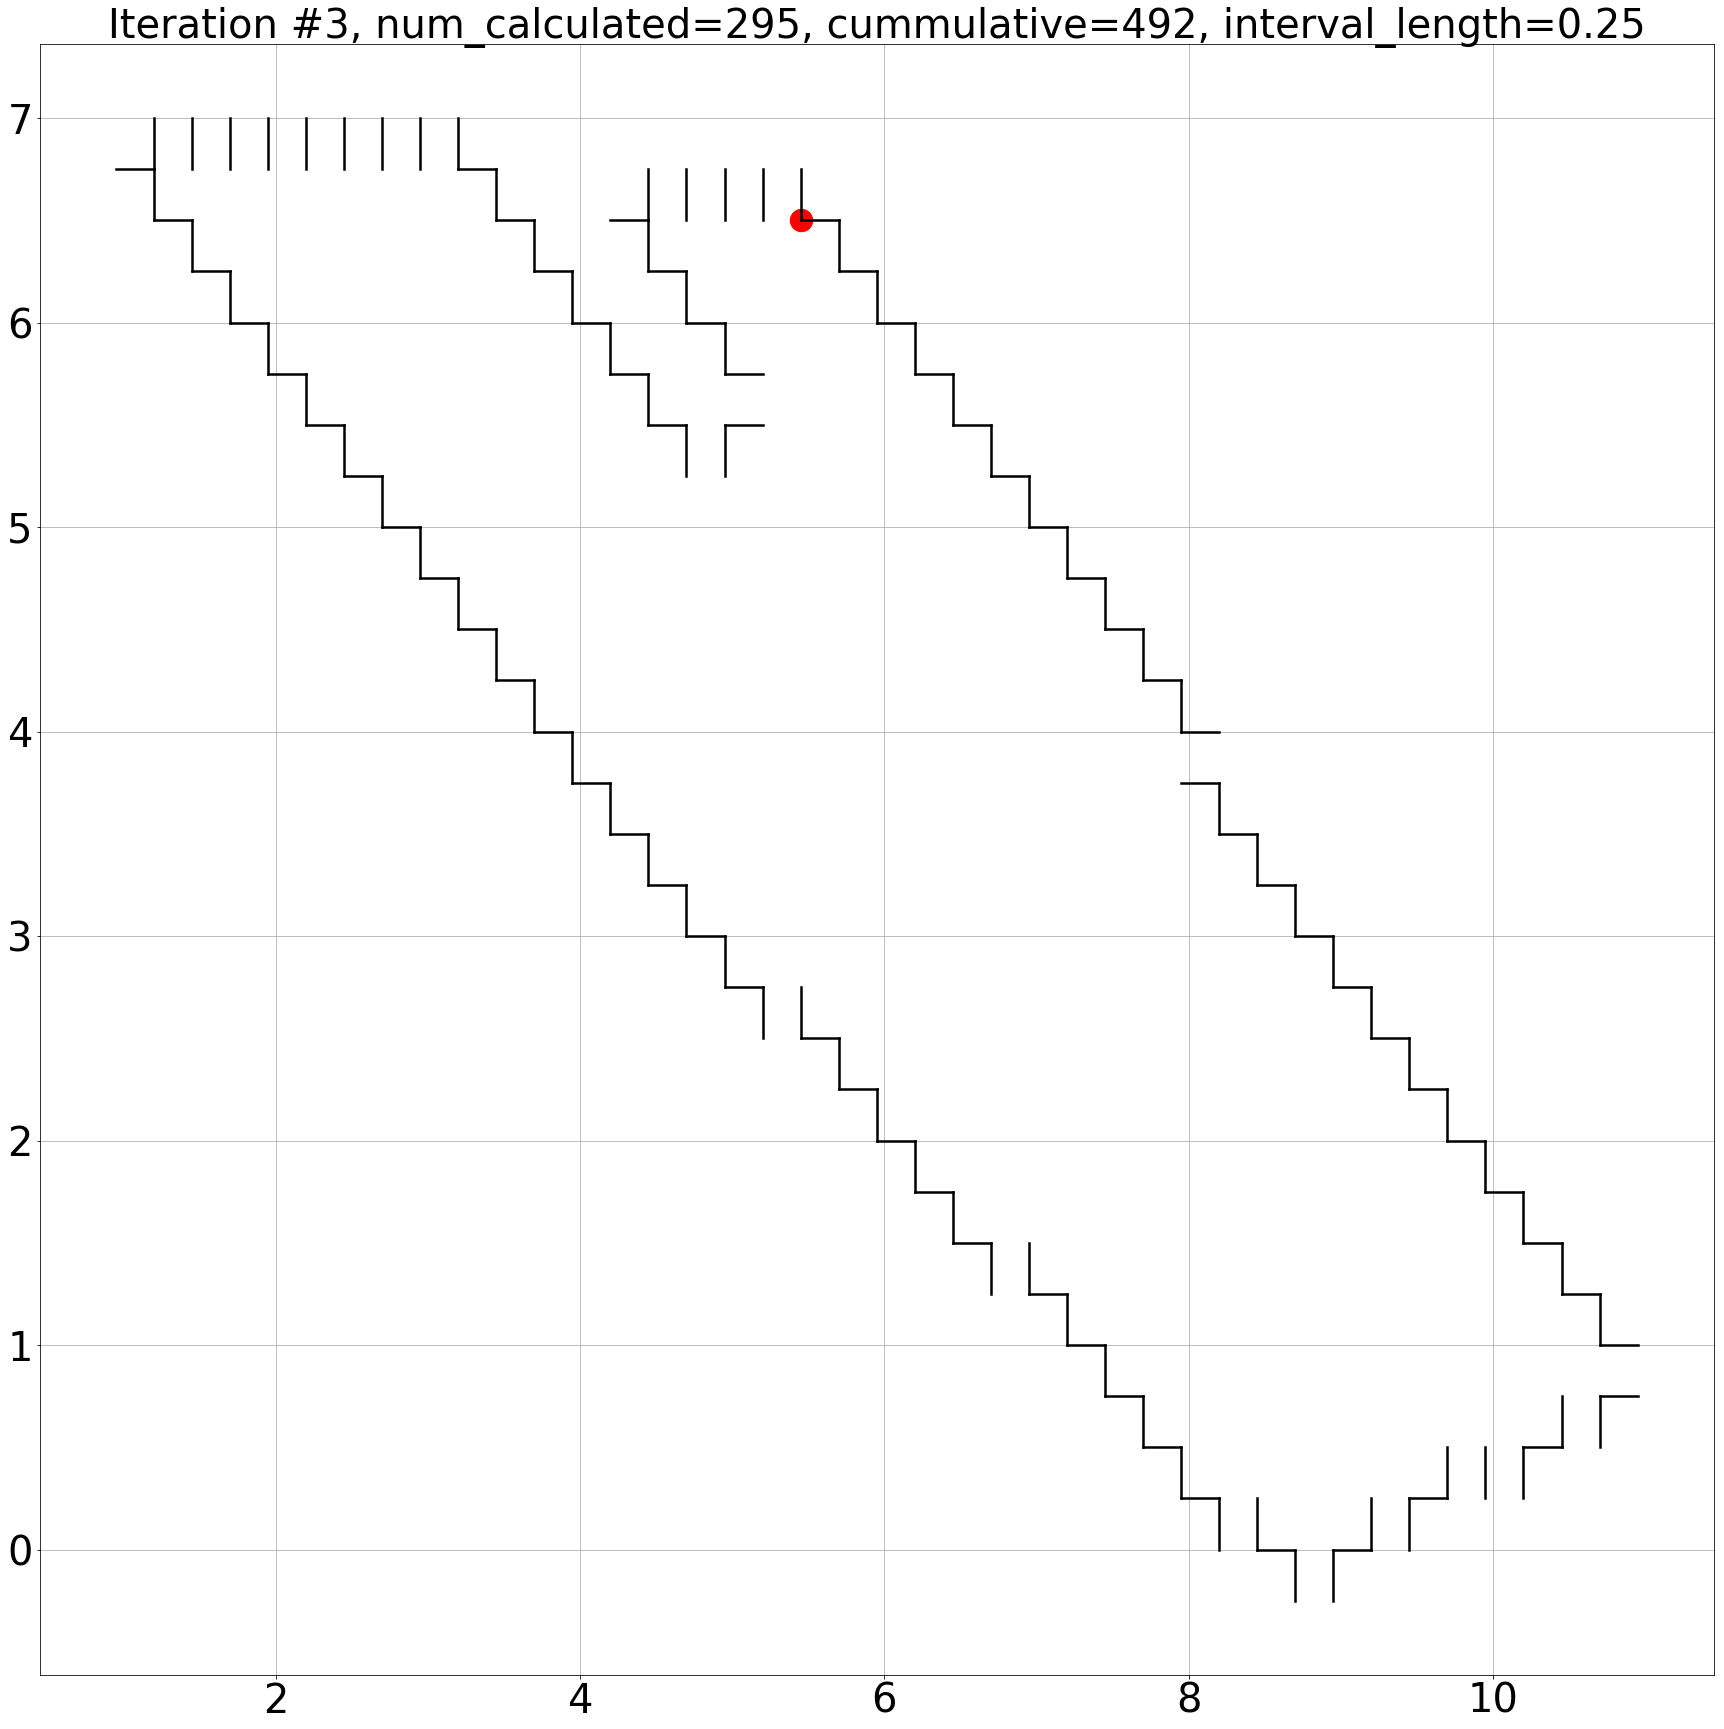

10


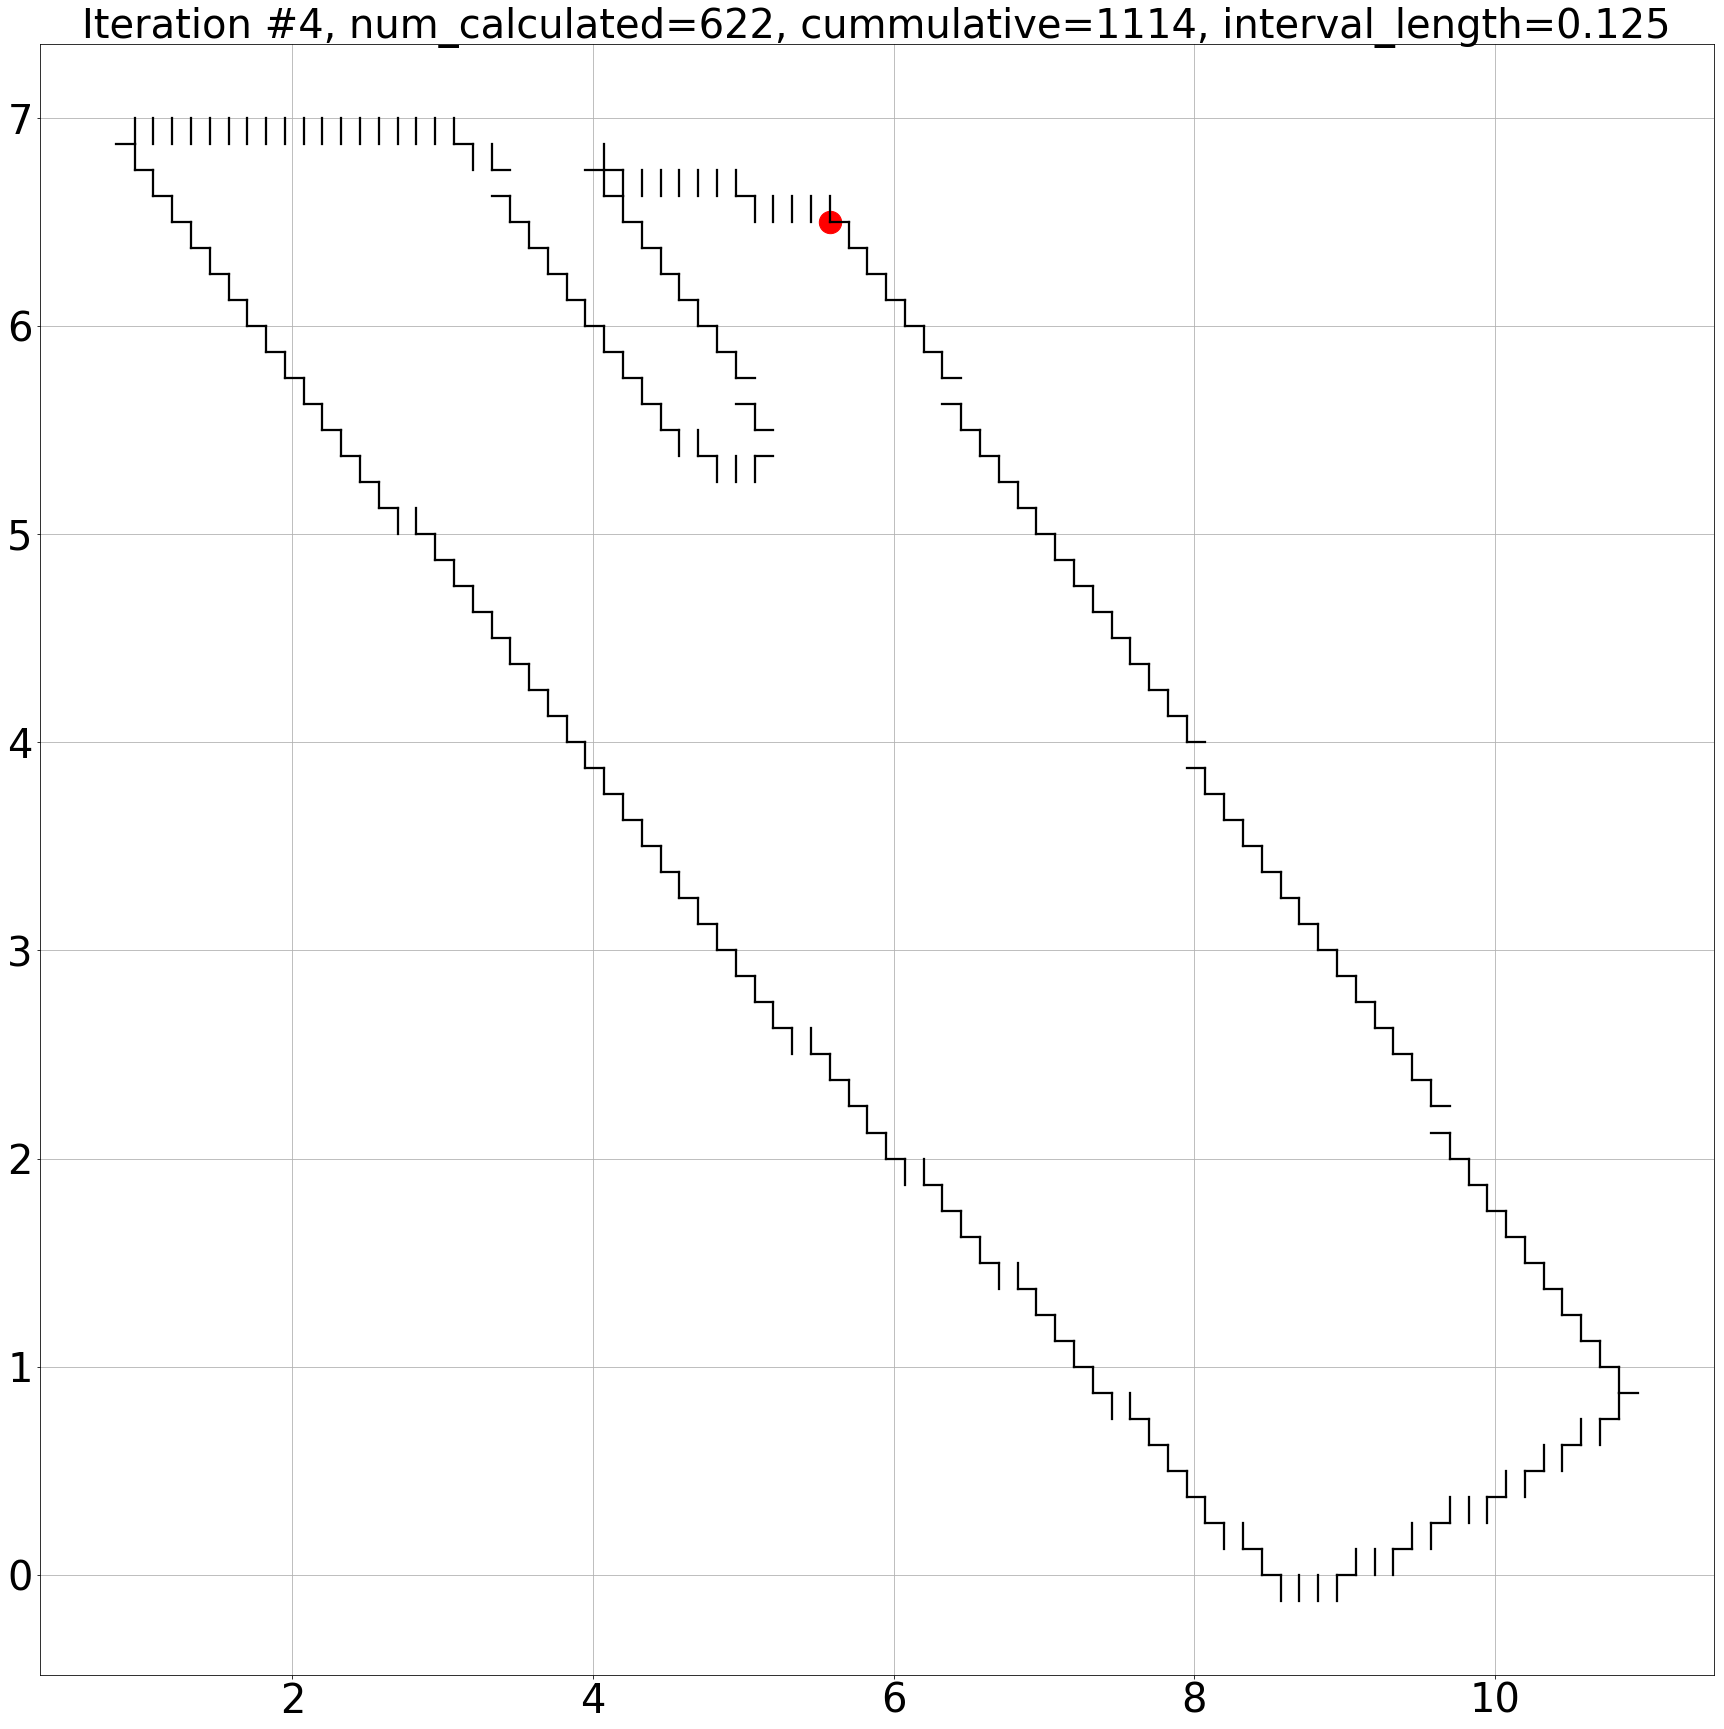

9


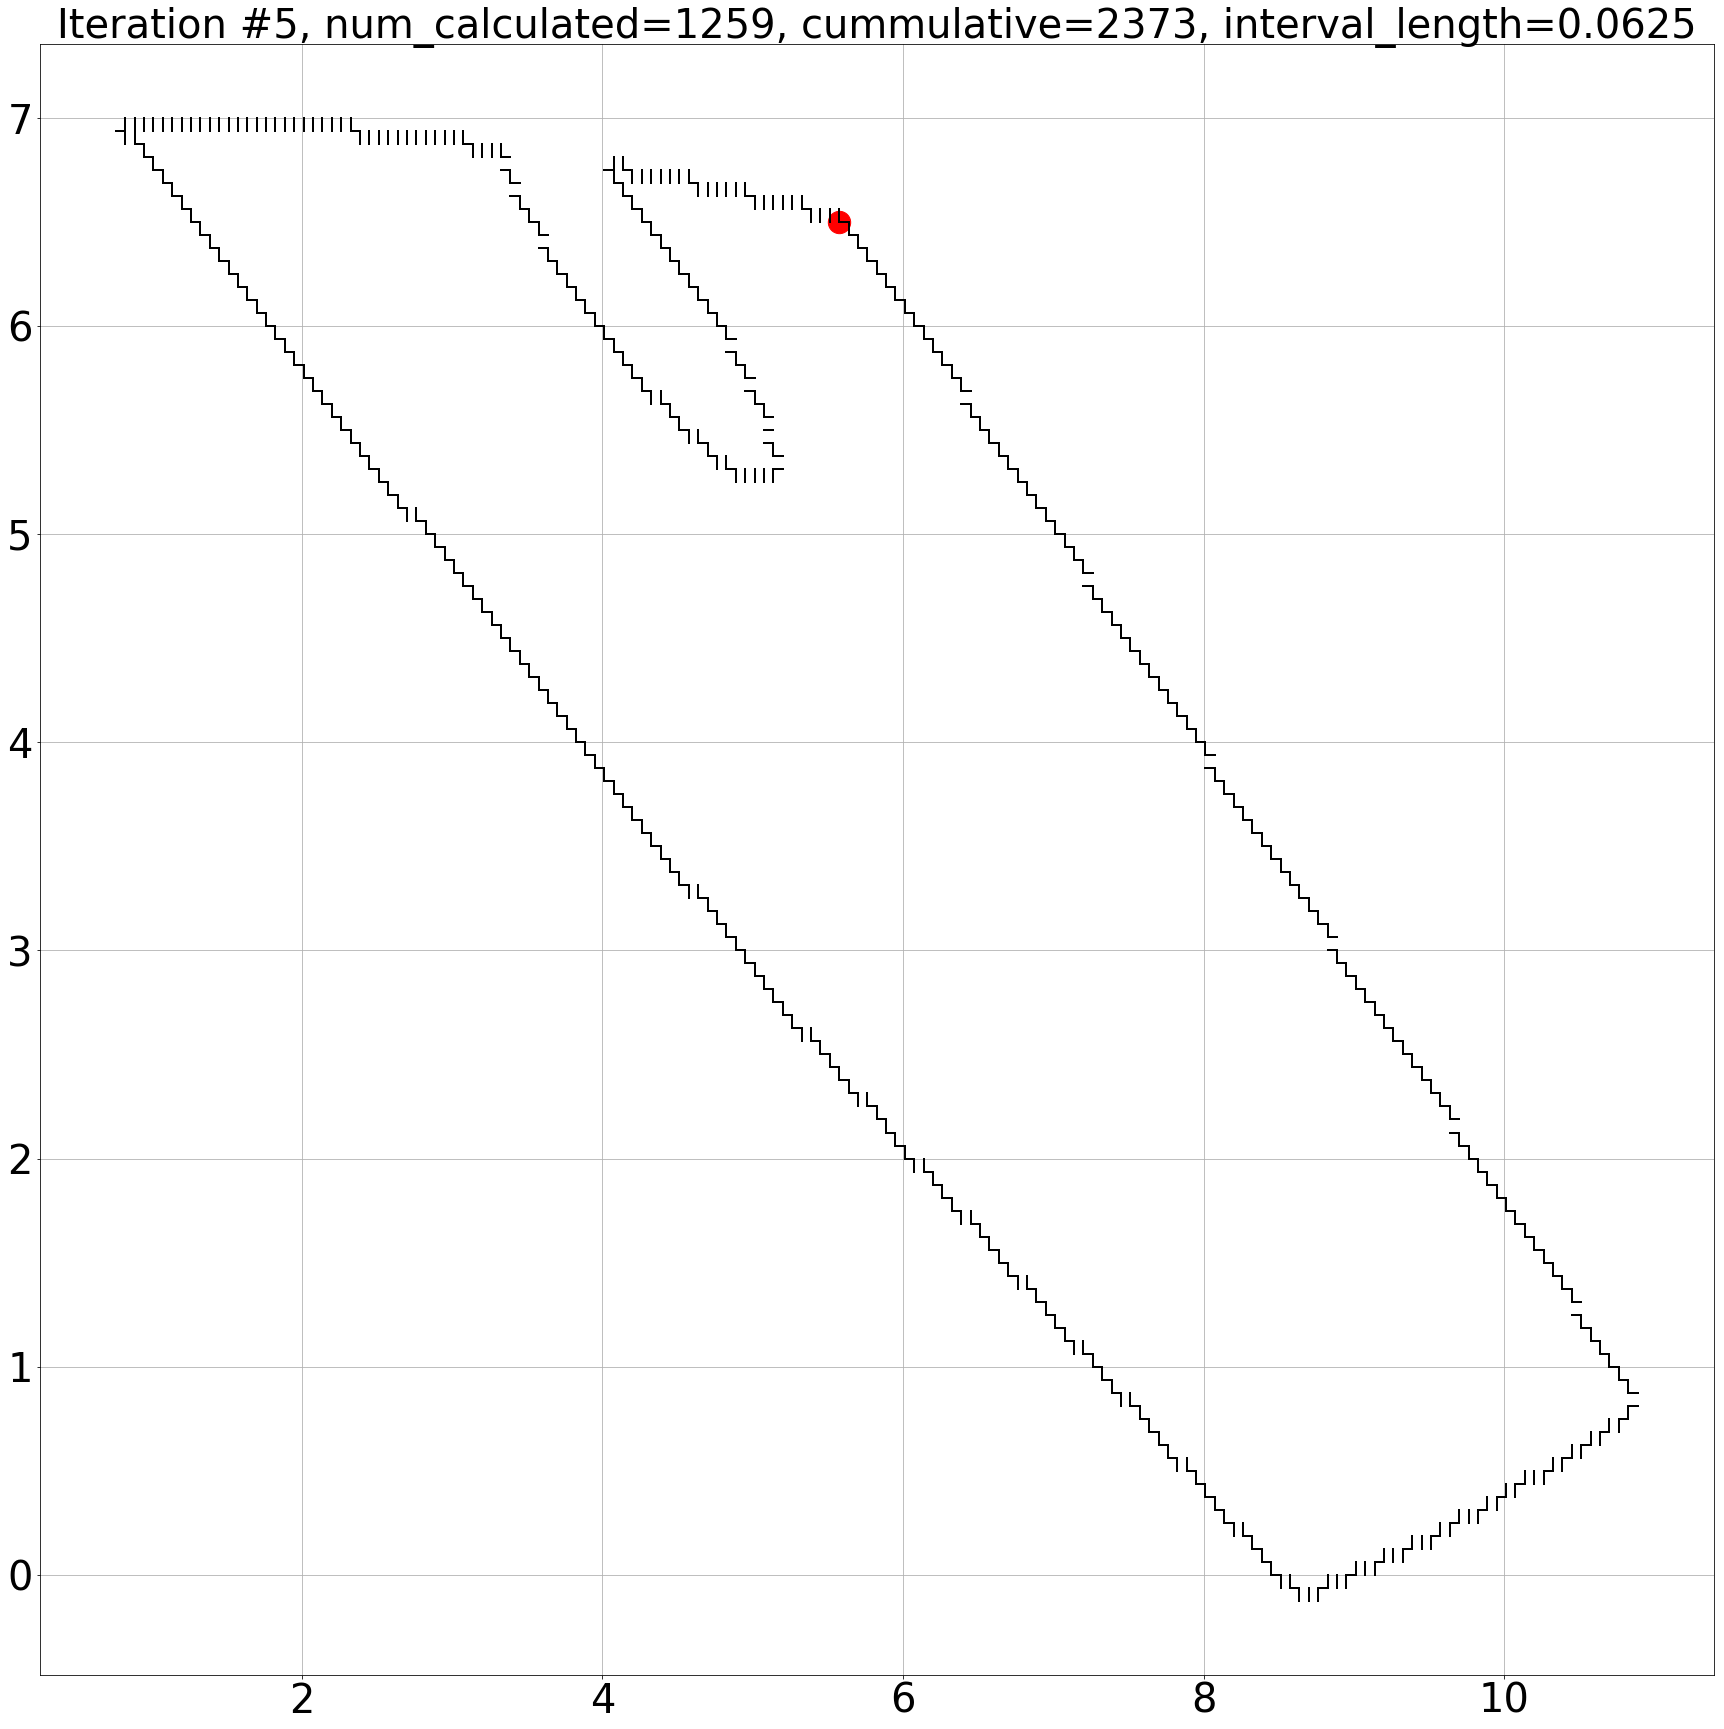

8


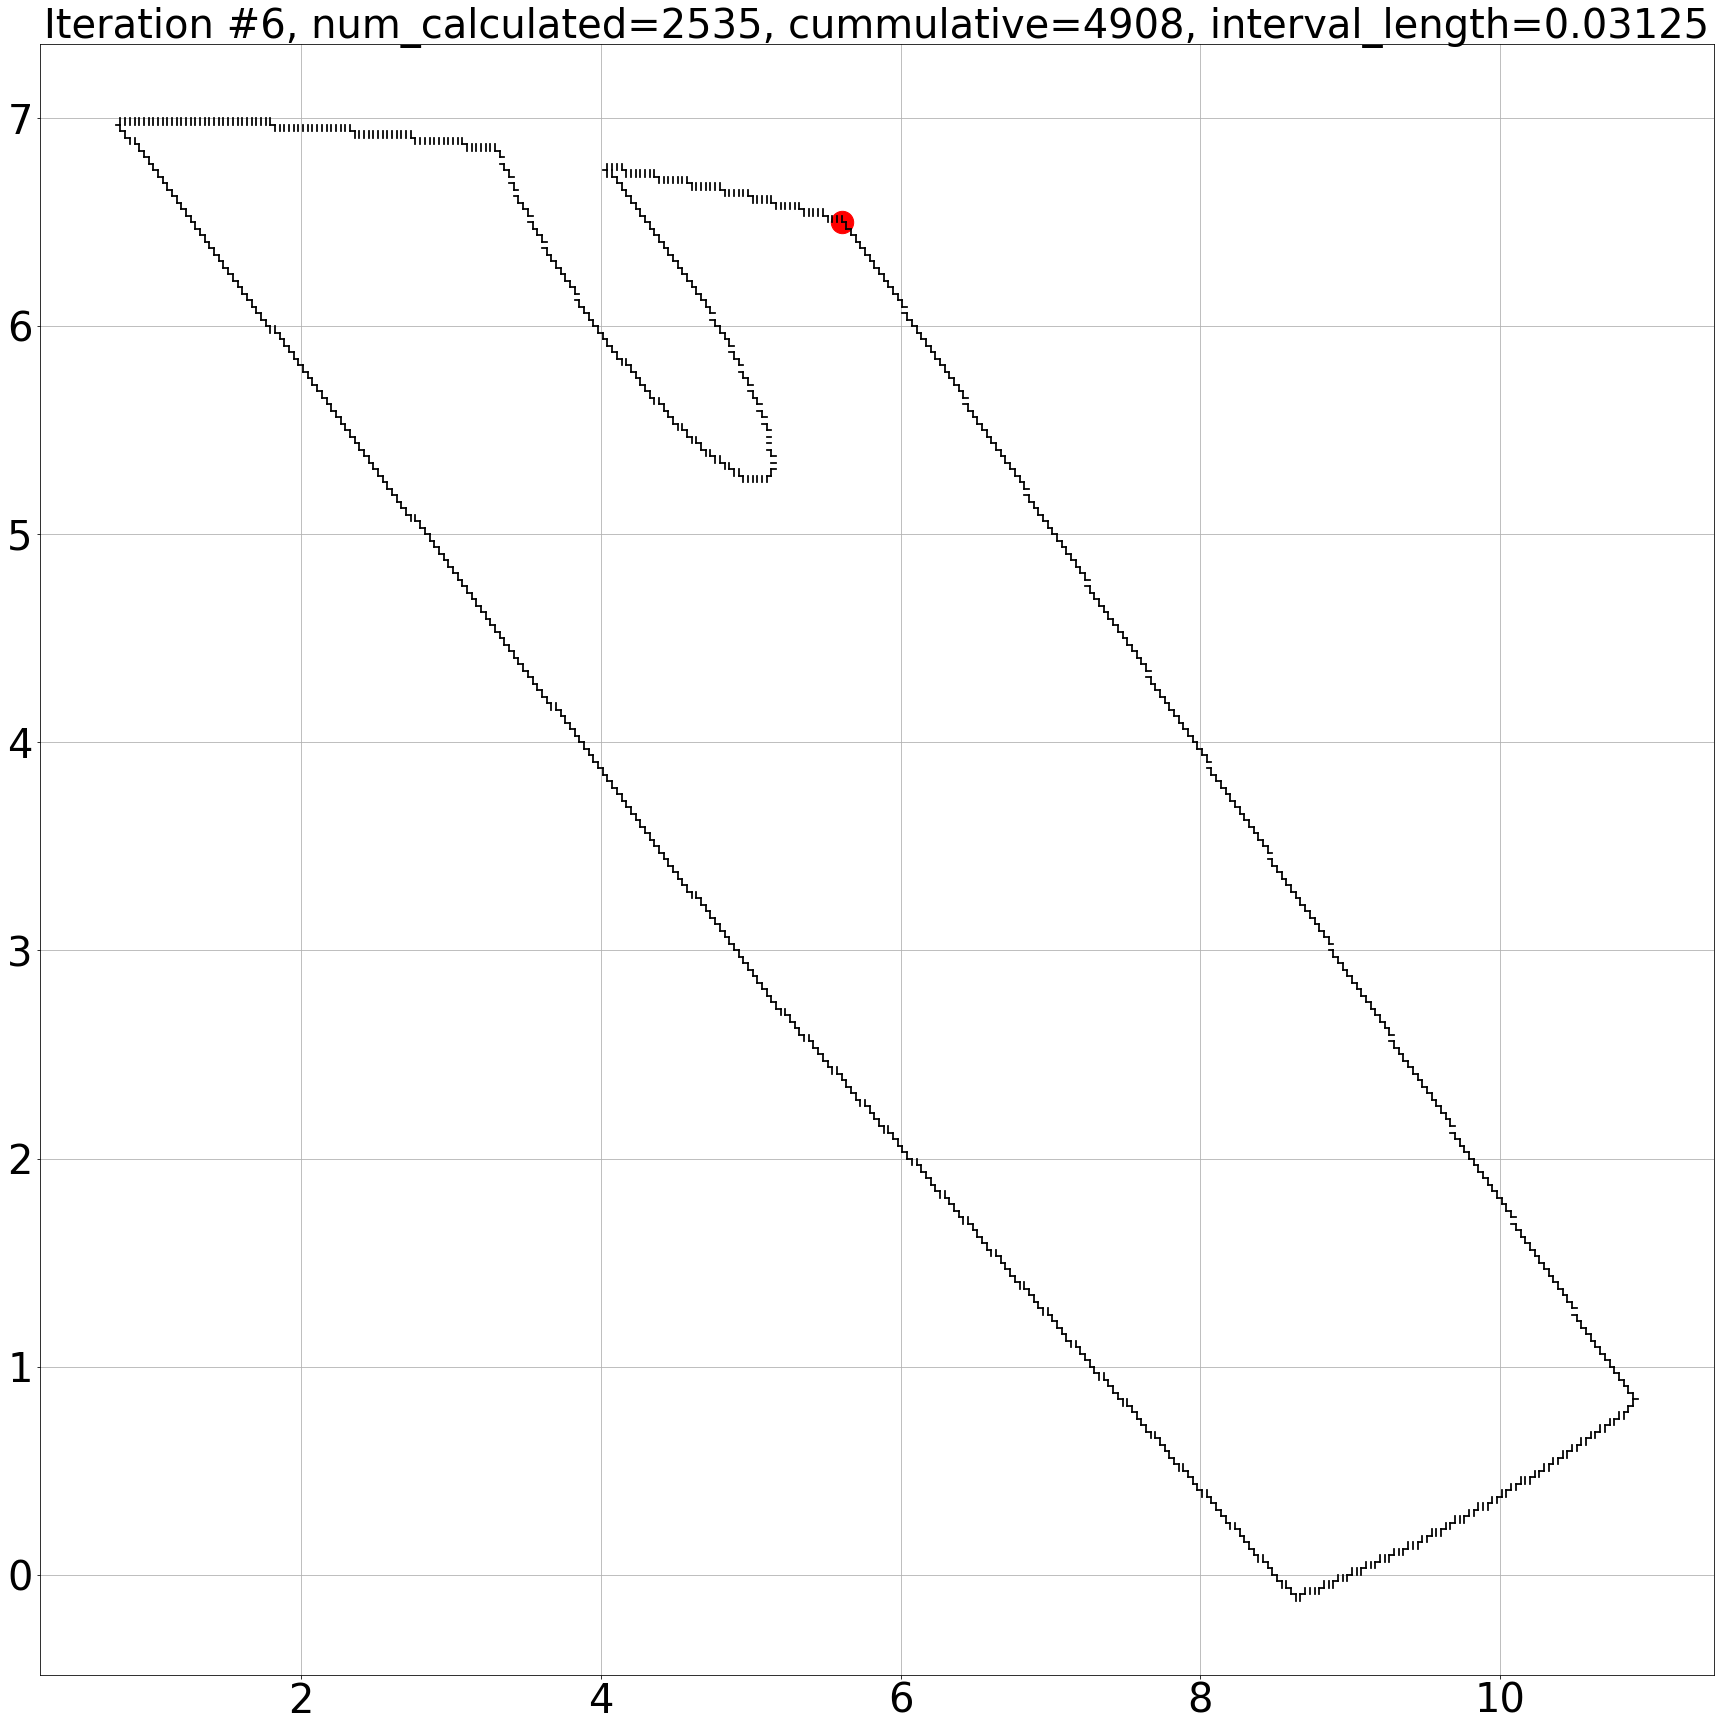

7


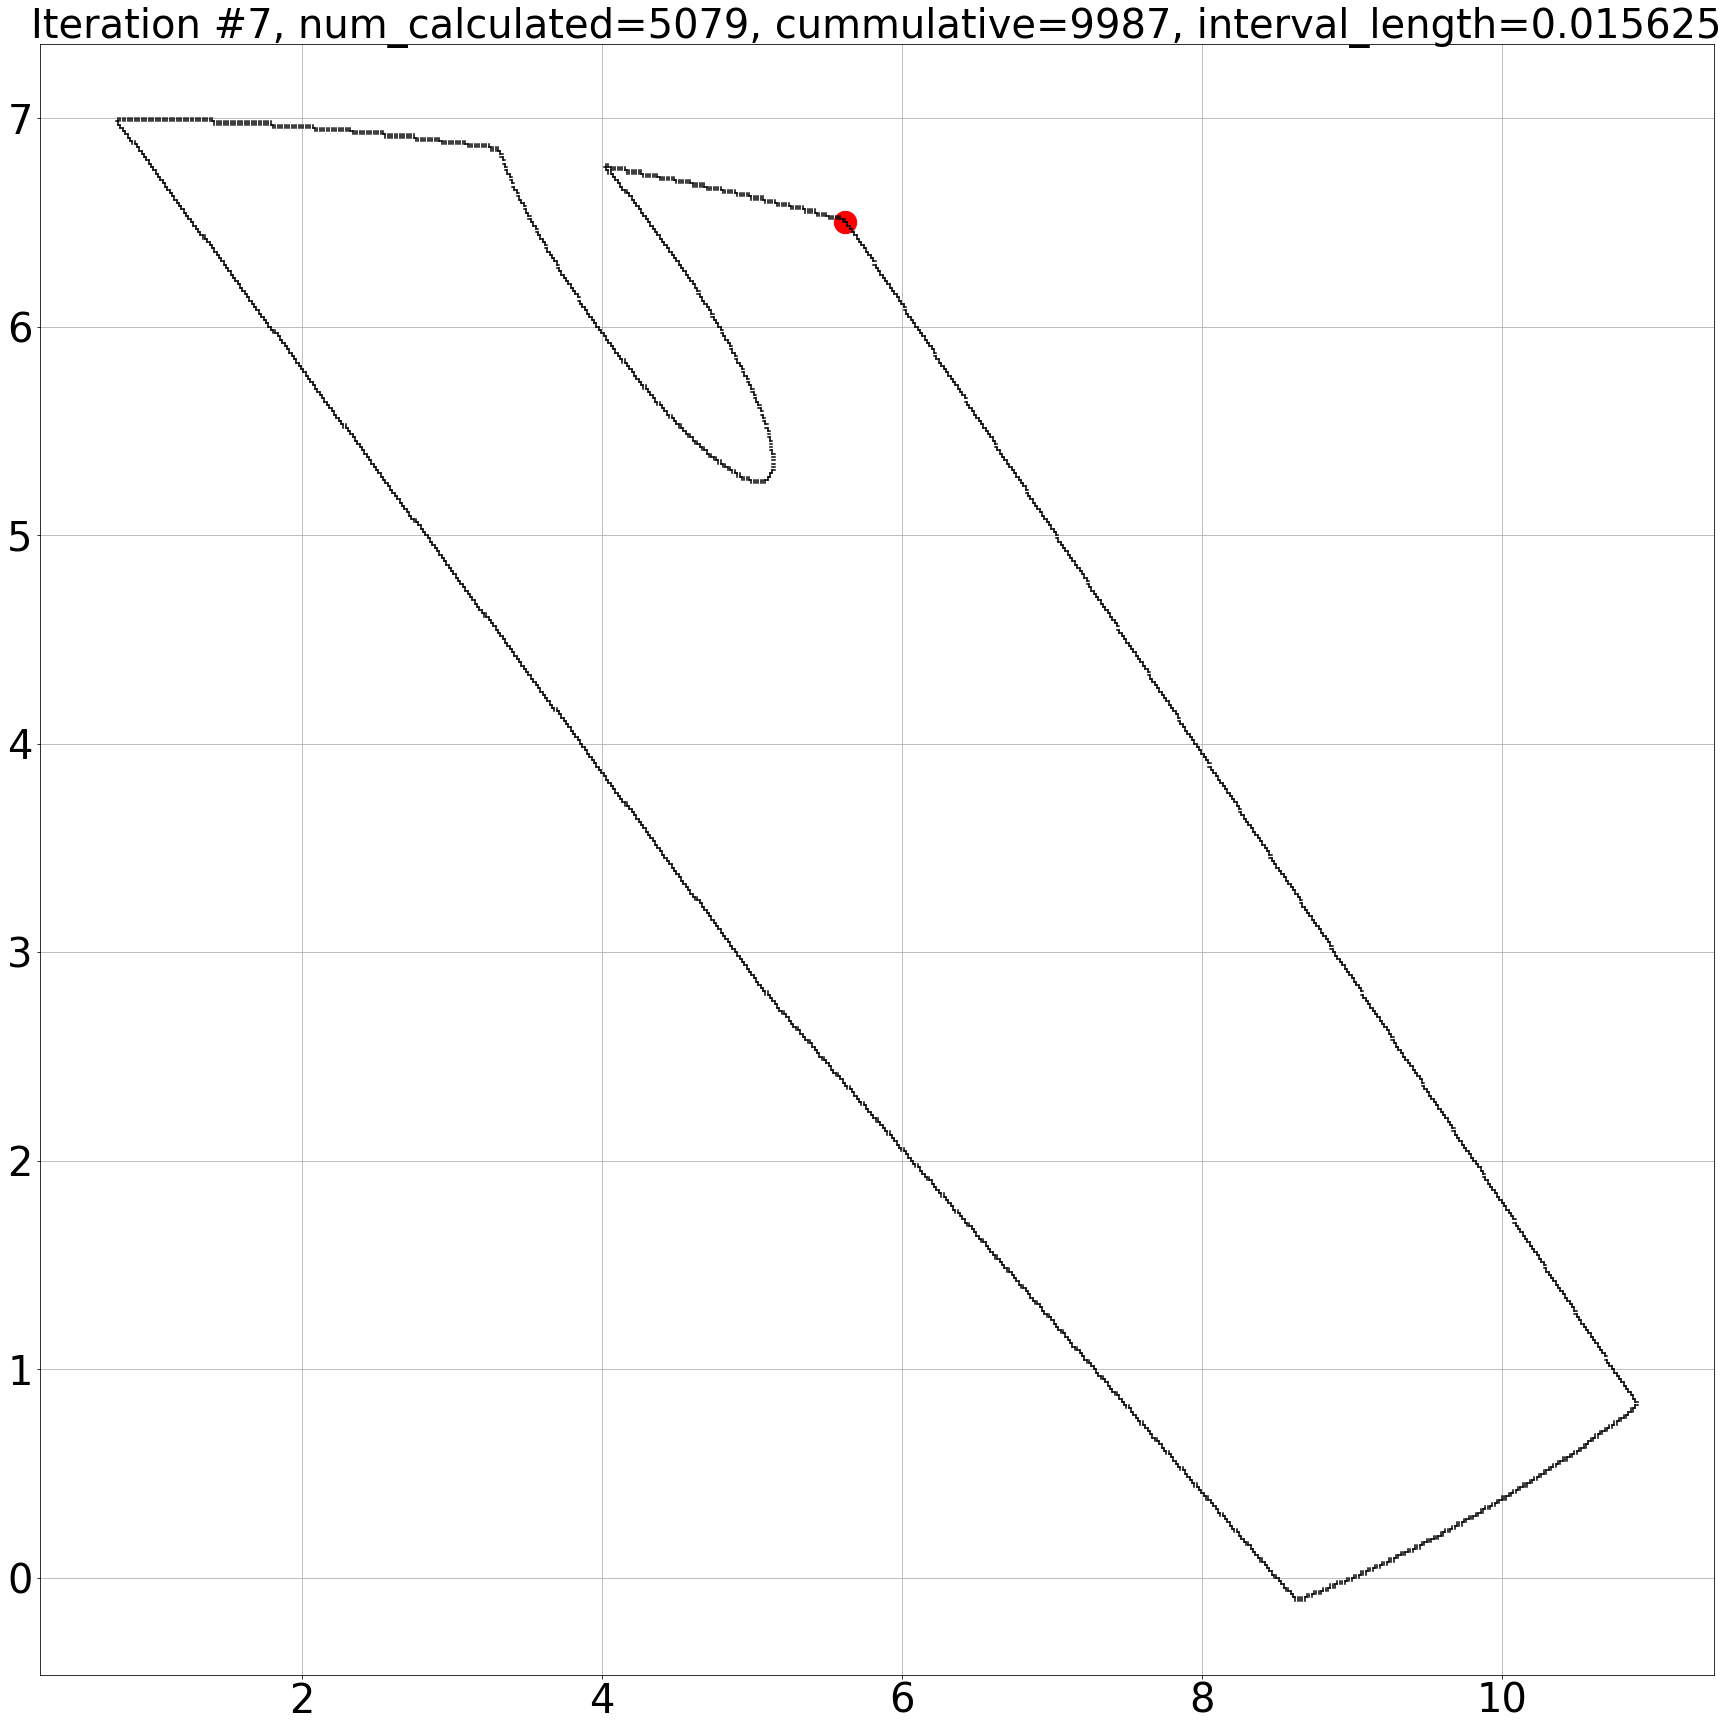

6


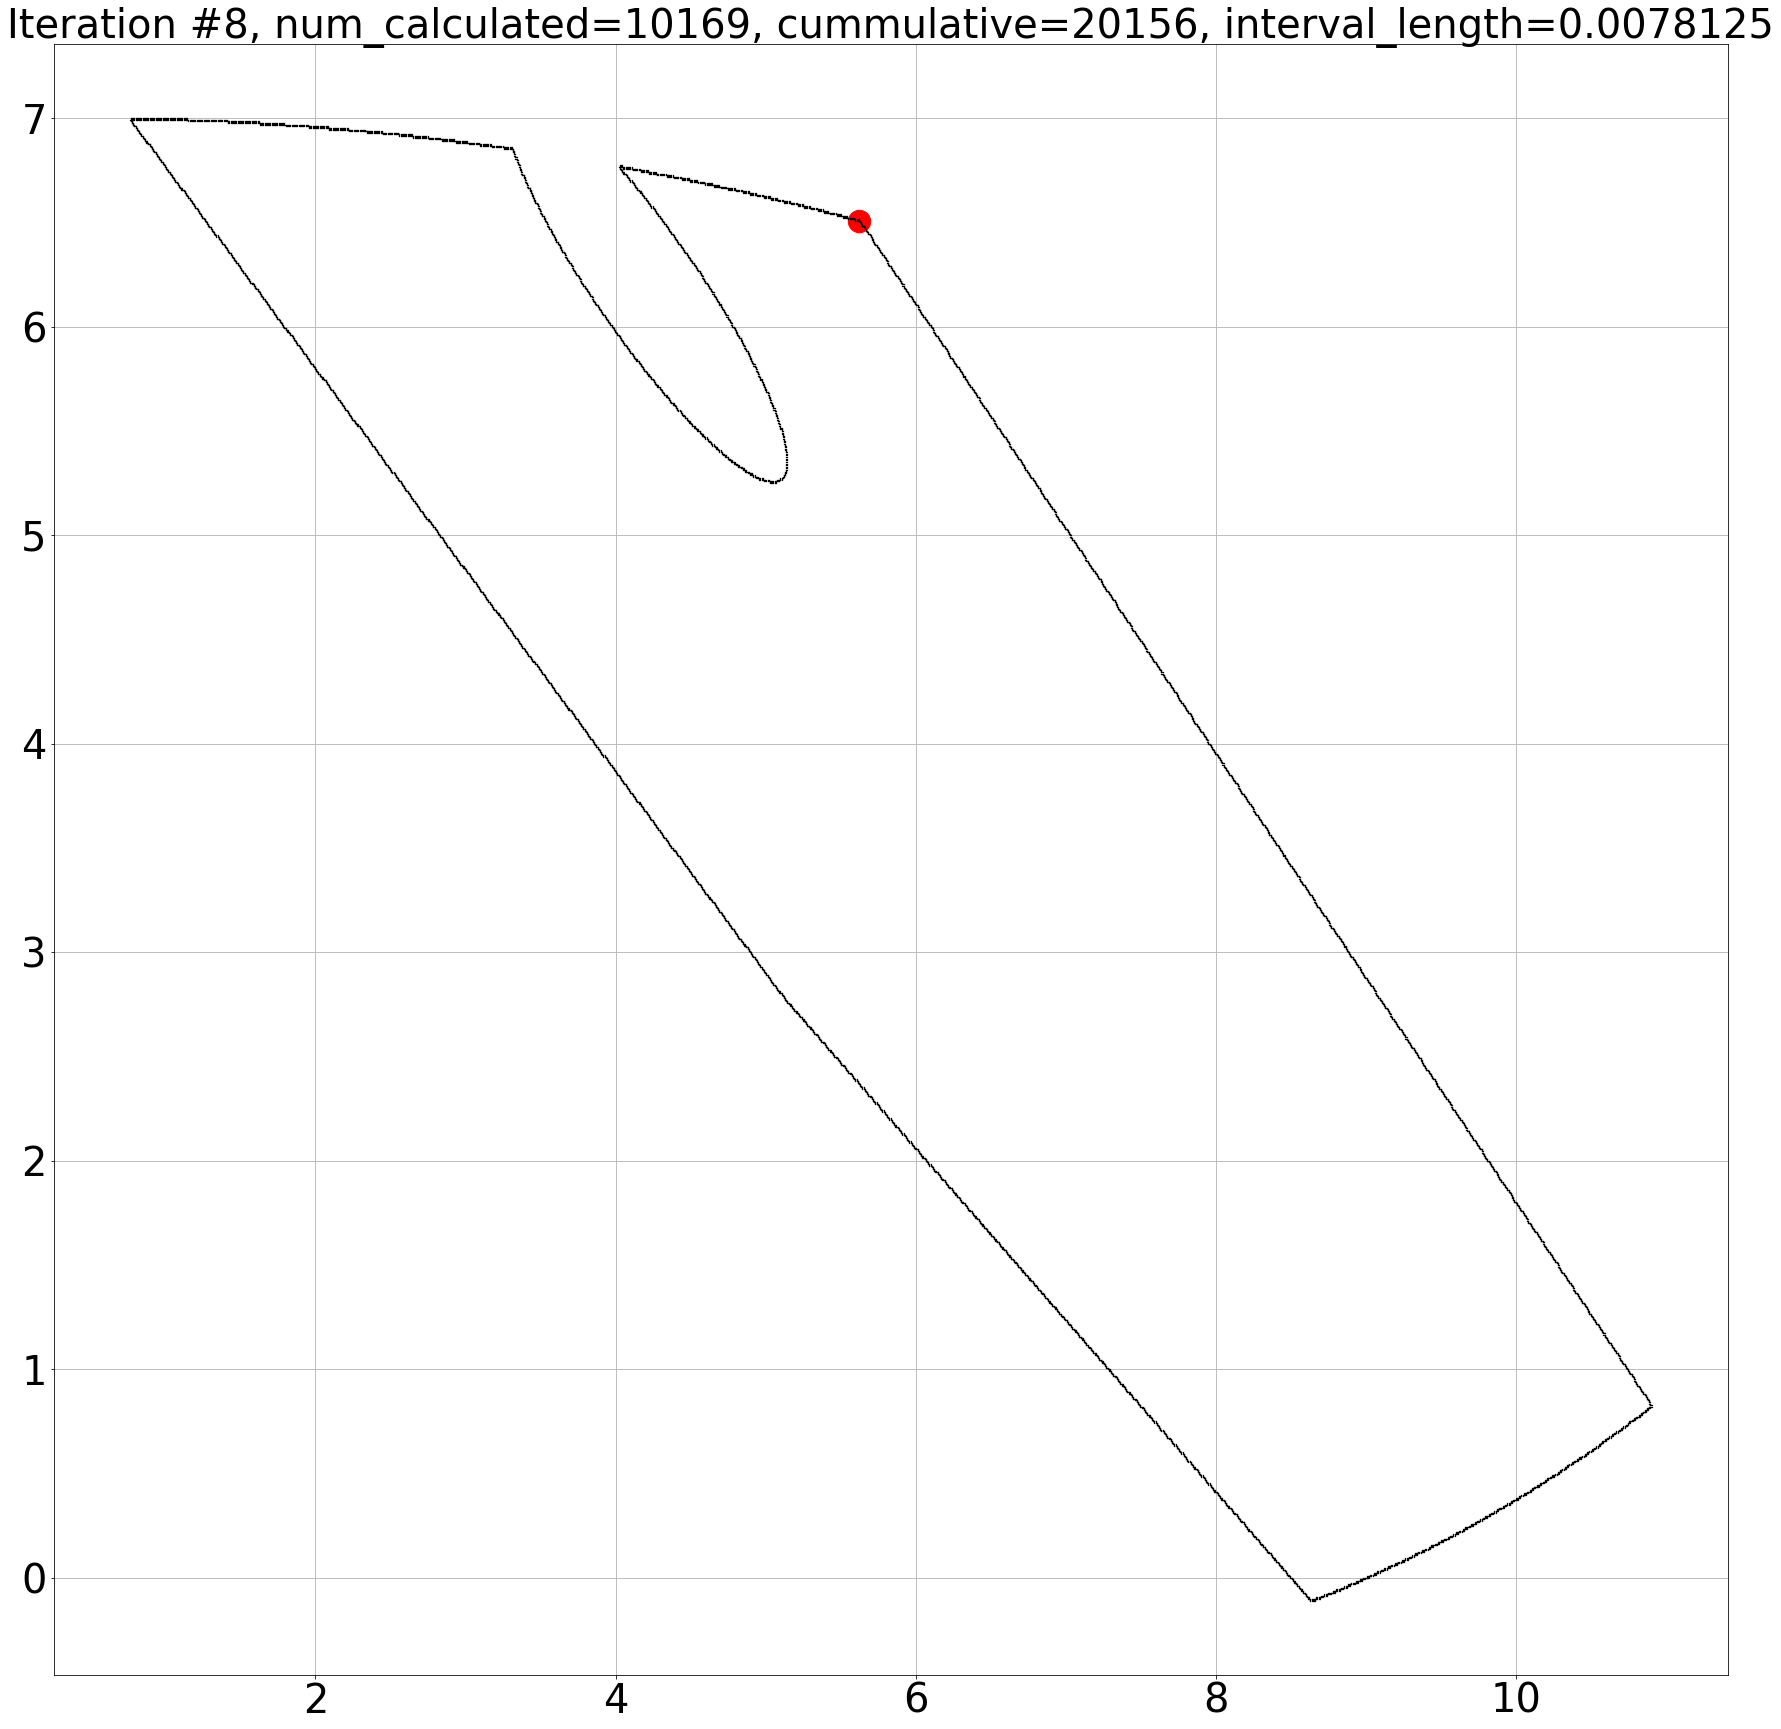

5
4
3
2


In [264]:
while (it != 1):
    print(it)
    it -= 1
    step /= 2
    queue = deque()

    mid = answ[0].double_mid()
    start = answ[0].a.double()
    end = answ[0].b.double()

    real_point = get_coord(mid, inside, step)
    res = f(real_point[0], real_point[1])

    if res:
        queue.append(Interval(mid, end))
    else:
        queue.append(Interval(start, mid))

    answ, num_calc = first_step(queue, inside, step, it)
    
    
    funcs = [functional(get_coord(inter.a, inside, step)[0], get_coord(inter.a, inside, step)[1]) for inter in answ]
    j = np.argmin(funcs)
    best_answer.append(np.min(funcs))
    best_point.append(answ[j].a)
    real_point = get_coord(answ[j].a, inside, step)
    
    to_draw.append(len(calculated))
    if it >= 5: 
        draw(answ, it, num_calc, len(calculated), step, real_point)

In [257]:
best_answer

[54.400000000000006,
 51.900000000000006,
 51.150000000000006,
 50.775000000000006,
 50.775000000000006,
 50.681250000000006,
 50.634375000000006,
 50.595312500000006,
 50.583593750000006,
 50.577734375000006,
 50.575781250000006,
 50.575292968750006]

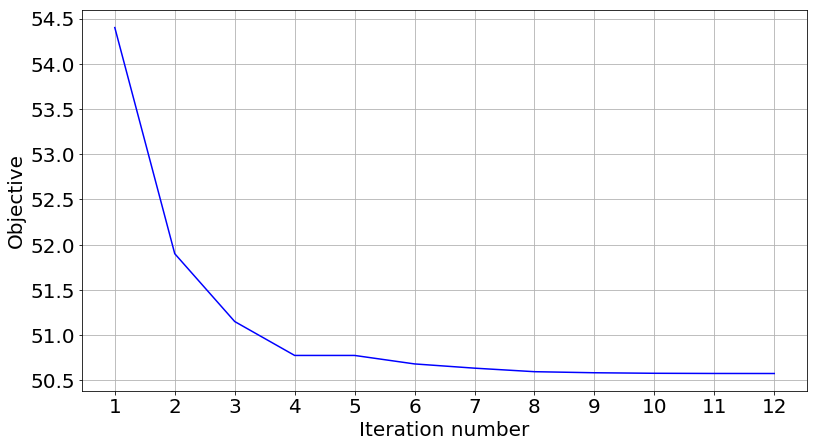

In [266]:
plt.figure(figsize=(13, 7))
plt.plot(np.arange(1, STEPS+1), best_answer, color="blue")
plt.grid()
plt.xticks(np.arange(1, STEPS + 1), fontsize=20)
plt.xlabel("Iteration number", fontsize=20)
plt.ylabel("Objective", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

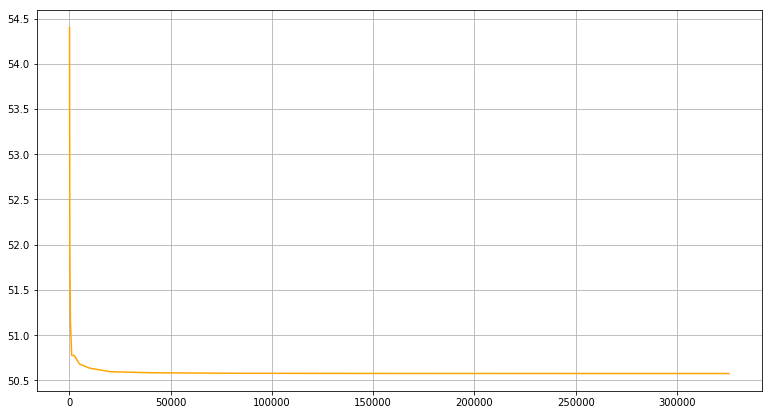

In [195]:
plt.figure(figsize=(13, 7))
plt.plot(to_draw, best_answer, color="orange")
plt.grid()
plt.show()

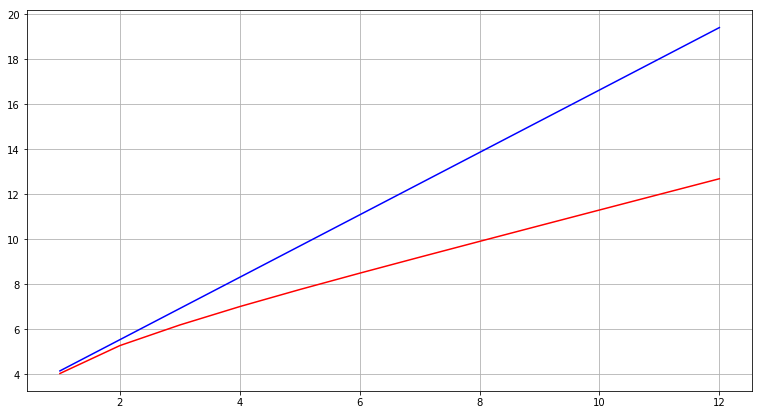

In [191]:
plt.figure(figsize=(13, 7))
plt.plot(np.arange(1, STEPS+1), np.log(to_draw), color="red")
plt.plot(np.arange(1, STEPS+1), np.log((40 / (5 / 2 ** np.arange(0, STEPS))) ** 2), color="blue")
plt.grid()


plt.show()